In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\FoodPrice_in_Turkey.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [5]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [6]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [9]:
df.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

# Lọc dữ liệu sản phẩm gạo, vẽ biểu đồ xu hướng qua các năm

In [10]:
df_rice = df.loc[df['ProductName'] == "Rice - Retail", :]

In [11]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 5833
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        174 non-null    object 
 1   ProductId    174 non-null    int64  
 2   ProductName  174 non-null    object 
 3   UmId         174 non-null    int64  
 4   UmName       174 non-null    object 
 5   Month        174 non-null    int64  
 6   Year         174 non-null    int64  
 7   Price        174 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 12.2+ KB


In [15]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(df_rice, x="Year", y = "Price", opacity=0.65,
    trendline='ols', trendline_color_override='red', title = "graph price rice by year")
fig.show()

- nhận xét: giá gạo tăng qua từng năm

# vẽ biểu đồ theo các quốc gia về rice-retail, Transport (public) - Retail

In [29]:
trans_df = df.loc[(df['ProductName'] == "rice-retail")| (df["ProductName"] == "Transport (public) - Retail"), :]

In [30]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1813 to 6761
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        131 non-null    object 
 1   ProductId    131 non-null    int64  
 2   ProductName  131 non-null    object 
 3   UmId         131 non-null    int64  
 4   UmName       131 non-null    object 
 5   Month        131 non-null    int64  
 6   Year         131 non-null    int64  
 7   Price        131 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 9.2+ KB


In [31]:
trans_df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
1813,National Average,304,Transport (public) - Retail,55,Course,1,2018,2.1867
1814,National Average,304,Transport (public) - Retail,55,Course,2,2018,2.1971
1815,National Average,304,Transport (public) - Retail,55,Course,3,2018,2.2050
1816,National Average,304,Transport (public) - Retail,55,Course,4,2018,2.2064
1817,National Average,304,Transport (public) - Retail,55,Course,5,2018,2.2093


In [36]:
trans_df = trans_df.groupby(by = "Place").sum()

In [37]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Ankara to National Average
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductId  4 non-null      int64  
 1   UmId       4 non-null      int64  
 2   Month      4 non-null      int64  
 3   Year       4 non-null      int64  
 4   Price      4 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [47]:
trans_df = trans_df.reset_index()

In [48]:
df['Price'].sum()

116167.408

In [49]:

trans_df['percentual %'] = (trans_df['Price']*100)/ df["Price"].sum()

In [50]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place         4 non-null      object 
 1   ProductId     4 non-null      int64  
 2   UmId          4 non-null      int64  
 3   Month         4 non-null      int64  
 4   Year          4 non-null      int64  
 5   Price         4 non-null      float64
 6   percentual %  4 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 352.0+ bytes


In [51]:
trans_df.head()

,Place,ProductId,UmId,Month,Year,Price,percentual %
0,Ankara,10640,1925,225,70631,85.7563,0.073821
1,Istanbul,10944,1980,234,72648,72.3179,0.062253
2,Izmir,10944,1980,234,72648,110.4762,0.095101
3,National Average,7296,1320,156,48444,54.7616,0.047140


In [55]:
grafico_dose1 = px.bar(trans_df, x="percentual %", y="Place", color=trans_df.index)
grafico_dose1.show()

# Vẽ biểu đồ tần số theo năm

<AxesSubplot:xlabel='Year', ylabel='count'>

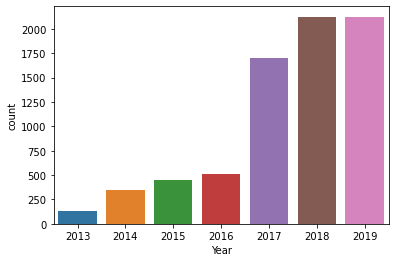

In [59]:
sns.countplot(x = "Year", data = df)

<AxesSubplot:xlabel='Price'>

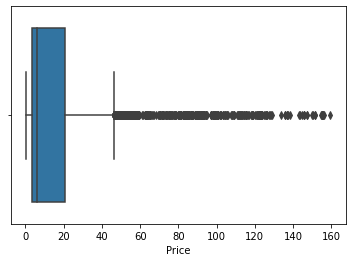

In [61]:
sns.boxplot(x=df["Price"])